In [330]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [331]:
#Lectura del CSV bike_train

df = pd.read_excel('bike_train.xlsx')

In [332]:
clima=pd.get_dummies(df.weathersit)
clima=clima.rename(columns={1: "clima_despejado", 2:"clima_nublado", 3:"clima_nieve", 4:"clima_lluvia"})  
estacion=pd.get_dummies(df.season)
estacion=estacion.rename(columns={1:"estacion_primavera", 2:"estacion_verano", 3:"estacion_otoño", 4:"estacion_invierno"})  #todo 0 es primavera

In [333]:
df= df.drop(["season", "weathersit"],axis=1)
df=pd.concat([df, clima, estacion], axis=1)

In [334]:
df.corr().loc["cnt"].sort_values()

hum                  -0.303672
estacion_primavera   -0.211014
clima_nieve          -0.136480
clima_nublado        -0.045067
holiday              -0.030304
estacion_invierno    -0.017715
clima_lluvia         -0.008802
weekday               0.022618
workingday            0.025132
mnth                  0.073431
estacion_otoño        0.090982
windspeed             0.094791
clima_despejado       0.123063
estacion_verano       0.153673
yr                    0.156960
instant               0.229814
atemp                 0.395234
temp                  0.395743
hr                    0.396698
casual                0.702414
registered            0.968540
cnt                   1.000000
Name: cnt, dtype: float64

In [335]:
X=df[["hum", "hr", "temp", "yr", "estacion_verano", "clima_despejado", "estacion_primavera", "clima_nieve"]]

In [336]:
y=df.cnt

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [338]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [339]:
y_test_pred = tree.predict(X_test)
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred, squared=False))

Error en datos de test: 79.02788837543855


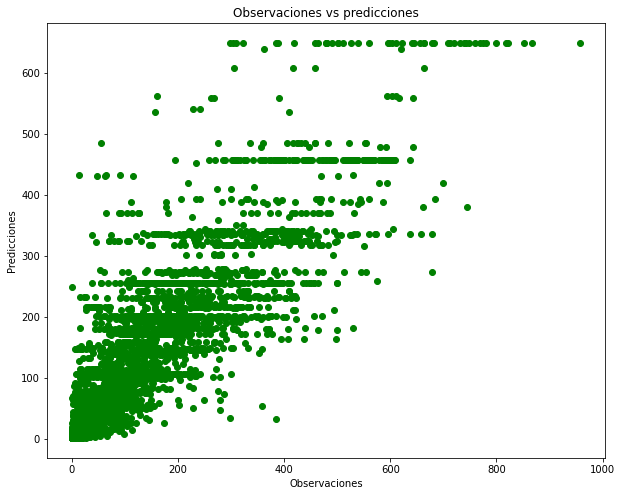

In [340]:
plt.figure(figsize = (10,8))
plt.axes()
plt.scatter(y_test, y_test_pred,  color='green')
plt.gca().update(dict(title='Observaciones vs predicciones', xlabel='Observaciones', ylabel='Predicciones'))

plt.show()

A continuación voy a predecir la variable cnt en el dataset bike_test

In [341]:
df2=pd.read_excel("bike_test.xlsx")

In [342]:
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,14689.500000,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968
std,1553.216555,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988
min,12000.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000
25%,13344.750000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500
50%,14689.500000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200
75%,16034.250000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700


In [343]:
clima2=pd.get_dummies(df2.weathersit)

In [344]:
clima2=clima2.rename(columns={1: "clima_despejado", 2:"clima_nublado", 3:"clima_nieve", 4:"clima_lluvia"})  

In [345]:
estacion2=pd.get_dummies(df2.season)

In [346]:
estacion2=estacion2.rename(columns={1:"estacion_primavera", 2:"estacion_verano", 3:"estacion_otoño", 4:"estacion_invierno"})

In [347]:
df2= df2.drop(["season", "weathersit"],axis=1)
df2=pd.concat([df2, clima2, estacion2], axis=1)

In [348]:
X_test2=df2[["hum", "hr", "temp", "yr", "estacion_verano", "clima_despejado", "estacion_primavera", "clima_nieve"]]

In [350]:
y_test_pred2 = tree.predict(X_test2)

In [351]:
predicciones=pd.DataFrame(y_test_pred2)
predicciones=predicciones.rename(columns={0:"pred"})
predicciones.to_csv('dfrankram.csv', index=False)